<a href="https://colab.research.google.com/github/onurercen/workout_prediction_app/blob/main/decision_tree_experience_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experience Level Prediction using Decision Tree Classifier

**Project:** BIL470 Machine Learning - Gym Members Exercise Analysis

---

## Table of Contents
1. Introduction & Problem Definition
2. Library Imports & Configuration
3. Data Loading & Initial Exploration
4. Data Preprocessing
5. Feature Engineering
6. Data Splitting Strategy
7. Baseline Model
8. Decision Tree Model Development
9. Hyperparameter Tuning
10. Model Evaluation
11. Overfitting Analysis
12. Feature Importance Analysis
13. Error Analysis
14. Conclusions

## 1. Introduction & Problem Definition

### 1.1 Problem Statement
Bu projede, spor salonu üyelerinin egzersiz verilerini kullanarak **deneyim seviyelerini (Experience Level)** tahmin etmeyi amaçlıyoruz.

### 1.2 Why Decision Tree?
- **Yorumlanabilirlik:** Karar ağaçları görsel ve anlaşılır
- **Karışık veri tipleri:** Hem kategorik hem sayısal veri işleyebilir
- **Non-linear relationships:** Doğrusal olmayan ilişkileri yakalayabilir
- **Feature importance:** Değişken önem sıralaması verir

### 1.3 Target Variable
- **Experience_Level:** 1 (Beginner), 2 (Intermediate), 3 (Advanced)
- **Problem Type:** Multi-class Classification (3 sınıf)

## 2. Library Imports & Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import (train_test_split, cross_val_score,
                                     GridSearchCV, learning_curve, StratifiedKFold)
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, f1_score)
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print('All libraries imported successfully!')
print(f'Random State: {RANDOM_STATE}')

All libraries imported successfully!
Random State: 42


## 3. Data Loading & Initial Exploration

In [3]:
df = pd.read_csv('gym_members_exercise_tracking.csv')

print('='*70)
print('DATA LOADING COMPLETE')
print('='*70)
print(f'Dataset Shape: {df.shape[0]} rows x {df.shape[1]} columns')
print(f'Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB')

DATA LOADING COMPLETE
Dataset Shape: 973 rows x 15 columns
Memory Usage: 202.08 KB


In [4]:
print('First 5 Rows:')
display(df.head())

First 5 Rows:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
print('Data Types:')
print(df.dtypes)

Data Types:
Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object


In [6]:
print('Statistical Summary:')
display(df.describe())

Statistical Summary:


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


TARGET VARIABLE: Experience_Level

Class Distribution:
   Level 1 (Beginner):  376 samples (38.6%)
   Level 2 (Intermediate):  406 samples (41.7%)
   Level 3 (Advanced):  191 samples (19.6%)


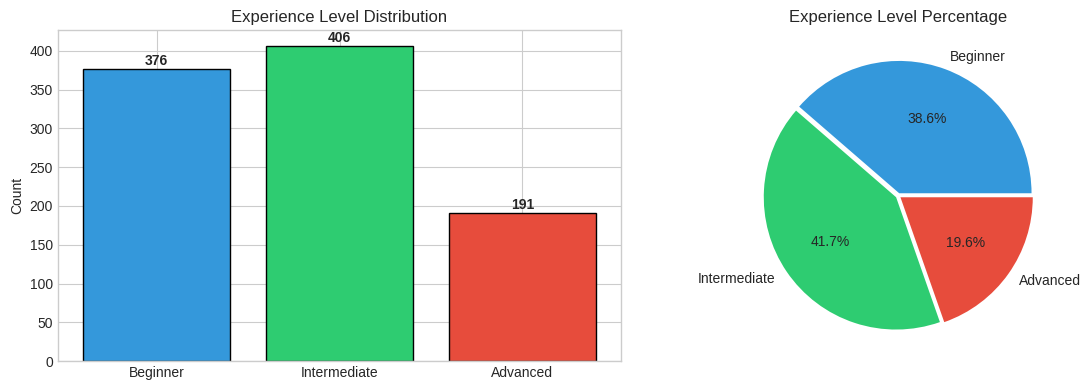


Class Imbalance Ratio: 2.13


In [7]:
print('='*70)
print('TARGET VARIABLE: Experience_Level')
print('='*70)

target_dist = df['Experience_Level'].value_counts().sort_index()
target_pct = df['Experience_Level'].value_counts(normalize=True).sort_index() * 100

print('\nClass Distribution:')
for level in target_dist.index:
    level_name = {1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'}[level]
    print(f'   Level {level} ({level_name}): {target_dist[level]:>4} samples ({target_pct[level]:.1f}%)')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
colors = ['#3498db', '#2ecc71', '#e74c3c']
axes[0].bar(['Beginner', 'Intermediate', 'Advanced'], target_dist.values, color=colors, edgecolor='black')
axes[0].set_ylabel('Count')
axes[0].set_title('Experience Level Distribution')
for i, v in enumerate(target_dist.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

axes[1].pie(target_dist.values, labels=['Beginner', 'Intermediate', 'Advanced'],
            autopct='%1.1f%%', colors=colors, explode=(0.02, 0.02, 0.02))
axes[1].set_title('Experience Level Percentage')
plt.tight_layout()
plt.savefig('target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

imbalance_ratio = target_dist.max() / target_dist.min()
print(f'\nClass Imbalance Ratio: {imbalance_ratio:.2f}')
if imbalance_ratio < 1.5:
    print('Classes are relatively balanced - no resampling needed')

## 4. Data Preprocessing

In [8]:
print('='*70)
print('MISSING VALUE ANALYSIS')
print('='*70)

missing_values = df.isnull().sum()
total_missing = missing_values.sum()
print(f'\nTotal Missing Values: {total_missing}')
if total_missing == 0:
    print('No missing values found!')

MISSING VALUE ANALYSIS

Total Missing Values: 0
No missing values found!


In [9]:
print('\n' + '='*70)
print('DUPLICATE ANALYSIS')
print('='*70)

duplicates = df.duplicated().sum()
print(f'\nDuplicate Rows: {duplicates}')
if duplicates > 0:
    df = df.drop_duplicates()
    print(f'New shape after removing duplicates: {df.shape}')
else:
    print('No duplicates found!')


DUPLICATE ANALYSIS

Duplicate Rows: 0
No duplicates found!


In [10]:
print('\n' + '='*70)
print('OUTLIER DETECTION (IQR Method)')
print('='*70)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Experience_Level' in numeric_cols:
    numeric_cols.remove('Experience_Level')

def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

print('\nOutliers per Feature:')
outlier_counts = {}
for col in numeric_cols:
    n_outliers = count_outliers_iqr(df[col])
    outlier_counts[col] = n_outliers
    if n_outliers > 0:
        print(f'   {col}: {n_outliers} outliers ({n_outliers/len(df)*100:.1f}%)')

if sum(outlier_counts.values()) == 0:
    print('   No significant outliers detected!')


OUTLIER DETECTION (IQR Method)

Outliers per Feature:
   Weight (kg): 9 outliers (0.9%)
   Calories_Burned: 10 outliers (1.0%)
   BMI: 25 outliers (2.6%)


In [11]:
print('\n' + '='*70)
print('LABEL ENCODING')
print('='*70)

df_processed = df.copy()

le_gender = LabelEncoder()
df_processed['Gender_Encoded'] = le_gender.fit_transform(df_processed['Gender'])
print('\nGender Encoding:')
print(f"   {dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))}")

le_workout = LabelEncoder()
df_processed['Workout_Type_Encoded'] = le_workout.fit_transform(df_processed['Workout_Type'])
print('\nWorkout Type Encoding:')
print(f"   {dict(zip(le_workout.classes_, le_workout.transform(le_workout.classes_)))}")

print('\nEncoding complete!')


LABEL ENCODING

Gender Encoding:
   {'Female': np.int64(0), 'Male': np.int64(1)}

Workout Type Encoding:
   {'Cardio': np.int64(0), 'HIIT': np.int64(1), 'Strength': np.int64(2), 'Yoga': np.int64(3)}

Encoding complete!


## 5. Feature Engineering

Bu bölümde domain knowledge kullanarak yeni özellikler oluşturuyoruz.

In [12]:
print('='*70)
print('FEATURE ENGINEERING')
print('='*70)
print('\nCreating 7 new features based on domain knowledge...\n')

# 1) HR_per_minute - Heart Rate per Minute of Exercise
# RATIONALE: Measures heart rate intensity relative to exercise duration
df_processed['HR_per_minute'] = df_processed['Avg_BPM'] / (df_processed['Session_Duration (hours)'] * 60)
print('1. HR_per_minute = Avg_BPM / (Session_Duration x 60)')
print('   -> Measures heart rate intensity per minute of exercise')
print(f'   -> Range: [{df_processed["HR_per_minute"].min():.3f}, {df_processed["HR_per_minute"].max():.3f}]\n')

# 2) Intensity_per_Weight - Calories burned per kg body weight
# RATIONALE: Normalizes calorie burn by body weight for fair comparison
df_processed['Intensity_per_Weight'] = df_processed['Calories_Burned'] / df_processed['Weight (kg)']
print('2. Intensity_per_Weight = Calories_Burned / Weight')
print('   -> Normalizes calorie burn by body weight')
print(f'   -> Range: [{df_processed["Intensity_per_Weight"].min():.2f}, {df_processed["Intensity_per_Weight"].max():.2f}]\n')

# 3) HRR - Heart Rate Reserve
# RATIONALE: Difference between max and resting HR indicates cardiovascular capacity
df_processed['HRR'] = df_processed['Max_BPM'] - df_processed['Resting_BPM']
print('3. HRR = Max_BPM - Resting_BPM')
print('   -> Heart Rate Reserve: indicates cardiovascular capacity')
print(f'   -> Range: [{df_processed["HRR"].min()}, {df_processed["HRR"].max()}]\n')

# 4) Efficiency - Aerobic Efficiency (Calories per heartbeat)
# RATIONALE: Higher efficiency means better cardiovascular performance
df_processed['Efficiency'] = df_processed['Calories_Burned'] / df_processed['Avg_BPM']
print('4. Efficiency = Calories_Burned / Avg_BPM')
print('   -> Aerobic efficiency: calories burned per heartbeat')
print(f'   -> Range: [{df_processed["Efficiency"].min():.2f}, {df_processed["Efficiency"].max():.2f}]\n')

# 5) Anaerobic_Index
# RATIONALE: Ratio indicating how much heart rate spikes during exercise
df_processed['Anaerobic_Index'] = (df_processed['Max_BPM'] - df_processed['Avg_BPM']) / df_processed['Resting_BPM']
print('5. Anaerobic_Index = (Max_BPM - Avg_BPM) / Resting_BPM')
print('   -> Indicates proportion of high-intensity work')
print(f'   -> Range: [{df_processed["Anaerobic_Index"].min():.3f}, {df_processed["Anaerobic_Index"].max():.3f}]\n')

# 6) BPM_Variance_Rest
# RATIONALE: Captures intensity of workout relative to baseline
df_processed['BPM_Variance_Rest'] = (df_processed['Avg_BPM'] - df_processed['Resting_BPM']) ** 2
print('6. BPM_Variance_Rest = (Avg_BPM - Resting_BPM)^2')
print('   -> Variance of heart rate from resting state')
print(f'   -> Range: [{df_processed["BPM_Variance_Rest"].min():.0f}, {df_processed["BPM_Variance_Rest"].max():.0f}]\n')

# 7) Heart_Instability
# RATIONALE: High instability might indicate interval training or poor pacing
df_processed['Heart_Instability'] = abs(df_processed['Max_BPM'] - df_processed['Avg_BPM']) / df_processed['Max_BPM']
print('7. Heart_Instability = |Max_BPM - Avg_BPM| / Max_BPM')
print('   -> Relative heart rate variability during exercise')
print(f'   -> Range: [{df_processed["Heart_Instability"].min():.3f}, {df_processed["Heart_Instability"].max():.3f}]\n')

print('='*70)
print('Feature Engineering Complete: 7 new features created')
print('='*70)

FEATURE ENGINEERING

Creating 7 new features based on domain knowledge...

1. HR_per_minute = Avg_BPM / (Session_Duration x 60)
   -> Measures heart rate intensity per minute of exercise
   -> Range: [1.036, 5.633]

2. Intensity_per_Weight = Calories_Burned / Weight
   -> Normalizes calorie burn by body weight
   -> Range: [2.82, 28.71]

3. HRR = Max_BPM - Resting_BPM
   -> Heart Rate Reserve: indicates cardiovascular capacity
   -> Range: [86, 149]

4. Efficiency = Calories_Burned / Avg_BPM
   -> Aerobic efficiency: calories burned per heartbeat
   -> Range: [2.30, 10.94]

5. Anaerobic_Index = (Max_BPM - Avg_BPM) / Resting_BPM
   -> Indicates proportion of high-intensity work
   -> Range: [-0.132, 1.580]

6. BPM_Variance_Rest = (Avg_BPM - Resting_BPM)^2
   -> Variance of heart rate from resting state
   -> Range: [2116, 13924]

7. Heart_Instability = |Max_BPM - Avg_BPM| / Max_BPM
   -> Relative heart rate variability during exercise
   -> Range: [0.000, 0.397]

Feature Engineering Com


FEATURE CORRELATION WITH TARGET

Top 10 Features by Correlation with Experience_Level:
------------------------------------------------------------
   Workout_Frequency (days/week)       +0.837
   Session_Duration (hours)            +0.765
   Efficiency                          +0.743
   Calories_Burned                     +0.694
   Fat_Percentage                      -0.654
   HR_per_minute                       -0.619
   Intensity_per_Weight                +0.504
   Water_Intake (liters)               +0.304
   Age                                 -0.019
   BMI                                 +0.016


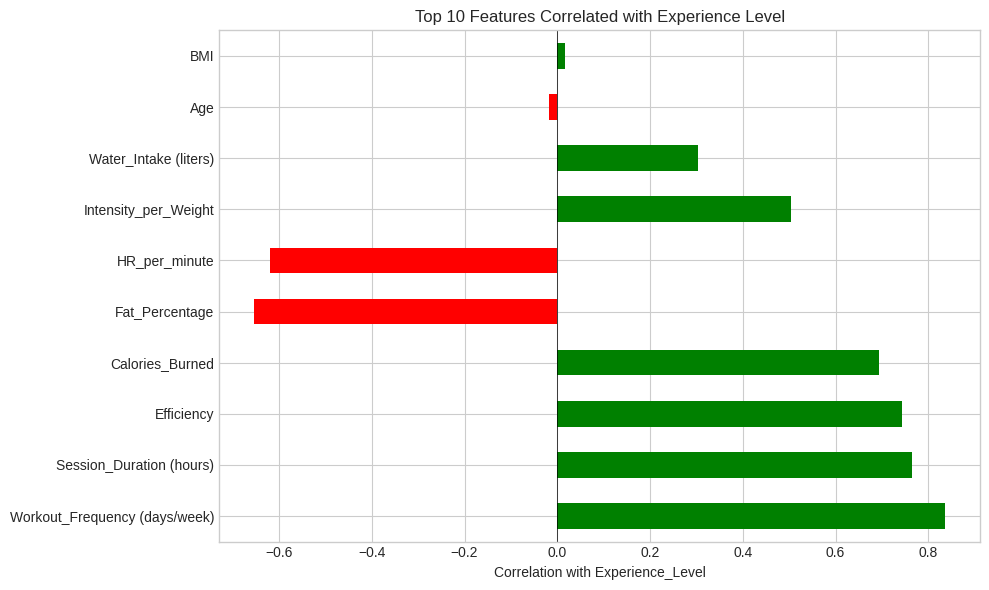

In [13]:
print('\n' + '='*70)
print('FEATURE CORRELATION WITH TARGET')
print('='*70)

feature_cols_temp = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                     'Session_Duration (hours)', 'Calories_Burned', 'Workout_Frequency (days/week)',
                     'Fat_Percentage', 'Water_Intake (liters)', 'BMI',
                     'HR_per_minute', 'Intensity_per_Weight', 'HRR', 'Efficiency',
                     'Anaerobic_Index', 'BPM_Variance_Rest', 'Heart_Instability']

correlations = df_processed[feature_cols_temp + ['Experience_Level']].corr()['Experience_Level'].drop('Experience_Level')
correlations_sorted = correlations.abs().sort_values(ascending=False)

print('\nTop 10 Features by Correlation with Experience_Level:')
print('-' * 60)
for feat in correlations_sorted.index[:10]:
    corr_val = correlations[feat]
    sign = '+' if corr_val > 0 else '-'
    print(f'   {feat:<35} {sign}{abs(corr_val):.3f}')

plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in correlations[correlations_sorted.index[:10]]]
correlations[correlations_sorted.index[:10]].plot(kind='barh', color=colors)
plt.xlabel('Correlation with Experience_Level')
plt.title('Top 10 Features Correlated with Experience Level')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('feature_correlations.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Data Splitting Strategy

In [14]:
print('='*70)
print('FEATURE SELECTION')
print('='*70)

feature_columns = [
    # Original numerical features
    'Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration (hours)', 'Calories_Burned', 'Workout_Frequency (days/week)',
    'Fat_Percentage', 'Water_Intake (liters)', 'BMI',
    # Encoded categorical features
    'Gender_Encoded', 'Workout_Type_Encoded',
    # Engineered features (7 new)
    'HR_per_minute', 'Intensity_per_Weight', 'HRR', 'Efficiency',
    'Anaerobic_Index', 'BPM_Variance_Rest', 'Heart_Instability'
]

print(f'\nTotal Features: {len(feature_columns)}')
print(f'   - Original numerical: 12')
print(f'   - Encoded categorical: 2')
print(f'   - Engineered: 7')

X = df_processed[feature_columns]
y = df_processed['Experience_Level']

print(f'\nFeature Matrix Shape: {X.shape}')
print(f'Target Vector Shape: {y.shape}')

FEATURE SELECTION

Total Features: 21
   - Original numerical: 12
   - Encoded categorical: 2
   - Engineered: 7

Feature Matrix Shape: (973, 21)
Target Vector Shape: (973,)


In [15]:
print('\n' + '='*70)
print('TRAIN-TEST SPLIT')
print('='*70)

TEST_SIZE = 0.30

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f'\nSplit Configuration:')
print(f'   - Test Size: {TEST_SIZE*100:.0f}%')
print(f'   - Stratified: Yes')
print(f'   - Random State: {RANDOM_STATE}')

print(f'\nTraining Set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)')
print(f'Test Set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)')

print('\nClass Distribution Verification:')
train_dist = y_train.value_counts(normalize=True).sort_index() * 100
test_dist = y_test.value_counts(normalize=True).sort_index() * 100
print(f'{"Set":<15} {"Level 1":<12} {"Level 2":<12} {"Level 3":<12}')
print('-' * 50)
print(f'{"Training":<15} {train_dist[1]:<12.1f} {train_dist[2]:<12.1f} {train_dist[3]:<12.1f}')
print(f'{"Test":<15} {test_dist[1]:<12.1f} {test_dist[2]:<12.1f} {test_dist[3]:<12.1f}')
print('\nStratification successful!')


TRAIN-TEST SPLIT

Split Configuration:
   - Test Size: 30%
   - Stratified: Yes
   - Random State: 42

Training Set: 681 samples (70.0%)
Test Set: 292 samples (30.0%)

Class Distribution Verification:
Set             Level 1      Level 2      Level 3     
--------------------------------------------------
Training        38.6         41.7         19.7        
Test            38.7         41.8         19.5        

Stratification successful!


## 7. Baseline Model

In [16]:
print('='*70)
print('BASELINE MODEL: Decision Tree with Default Parameters')
print('='*70)

baseline_model = DecisionTreeClassifier(random_state=RANDOM_STATE)

print('\nBaseline Configuration:')
print('   - criterion: gini (default)')
print('   - max_depth: None (default)')
print('   - min_samples_split: 2 (default)')
print('   - min_samples_leaf: 1 (default)')

print('\nTraining baseline model...')
baseline_model.fit(X_train, y_train)

y_train_pred_baseline = baseline_model.predict(X_train)
y_test_pred_baseline = baseline_model.predict(X_test)

train_acc_baseline = accuracy_score(y_train, y_train_pred_baseline)
test_acc_baseline = accuracy_score(y_test, y_test_pred_baseline)

print('\n' + '='*70)
print('BASELINE RESULTS')
print('='*70)
print(f'\nAccuracy:')
print(f'   - Training: {train_acc_baseline:.4f} ({train_acc_baseline*100:.2f}%)')
print(f'   - Test:     {test_acc_baseline:.4f} ({test_acc_baseline*100:.2f}%)')
print(f'   - Gap:      {train_acc_baseline - test_acc_baseline:.4f}')

if train_acc_baseline - test_acc_baseline > 0.10:
    print('\nWARNING: Significant overfitting detected!')
    print('The default tree is too complex. We need regularization.')

print(f'\nTree Statistics:')
print(f'   - Depth: {baseline_model.get_depth()}')
print(f'   - Leaves: {baseline_model.get_n_leaves()}')

BASELINE MODEL: Decision Tree with Default Parameters

Baseline Configuration:
   - criterion: gini (default)
   - max_depth: None (default)
   - min_samples_split: 2 (default)
   - min_samples_leaf: 1 (default)

Training baseline model...

BASELINE RESULTS

Accuracy:
   - Training: 1.0000 (100.00%)
   - Test:     0.8938 (89.38%)
   - Gap:      0.1062

The default tree is too complex. We need regularization.

Tree Statistics:
   - Depth: 15
   - Leaves: 41


In [17]:
print('\nBaseline Classification Report (Test Set):')
print('-' * 60)
print(classification_report(y_test, y_test_pred_baseline,
                            target_names=['Beginner', 'Intermediate', 'Advanced']))


Baseline Classification Report (Test Set):
------------------------------------------------------------
              precision    recall  f1-score   support

    Beginner       0.87      0.86      0.86       113
Intermediate       0.87      0.88      0.87       122
    Advanced       1.00      1.00      1.00        57

    accuracy                           0.89       292
   macro avg       0.91      0.91      0.91       292
weighted avg       0.89      0.89      0.89       292



## 8. Decision Tree Model Development

In [18]:
print('='*70)
print('PARAMETER EXPLORATION: Effect of max_depth')
print('='*70)

depths = [2, 3, 4, 5, 6, 7, 8, 10, 15, 20, None]
results = []

print('\nTesting different max_depth values...\n')
print(f'{"Depth":<10} {"Train Acc":<12} {"Test Acc":<12} {"Gap":<12} {"Leaves":<10}')
print('-' * 56)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    gap = train_acc - test_acc
    n_leaves = model.get_n_leaves()

    depth_str = str(depth) if depth else 'None'
    print(f'{depth_str:<10} {train_acc:<12.4f} {test_acc:<12.4f} {gap:<12.4f} {n_leaves:<10}')

    results.append({'depth': depth if depth else 99, 'depth_label': depth_str,
                    'train_acc': train_acc, 'test_acc': test_acc, 'gap': gap, 'n_leaves': n_leaves})

results_df = pd.DataFrame(results)

PARAMETER EXPLORATION: Effect of max_depth

Testing different max_depth values...

Depth      Train Acc    Test Acc     Gap          Leaves    
--------------------------------------------------------
2          0.8194       0.8082       0.0112       3         
3          0.9016       0.9041       -0.0025      4         
4          0.9016       0.9041       -0.0025      5         
5          0.9016       0.9041       -0.0025      6         
6          0.9046       0.9041       0.0004       8         
7          0.9222       0.8699       0.0523       11        
8          0.9369       0.8904       0.0464       15        
10         0.9633       0.8904       0.0729       25        
15         1.0000       0.8938       0.1062       41        
20         1.0000       0.8938       0.1062       41        
None       1.0000       0.8938       0.1062       41        


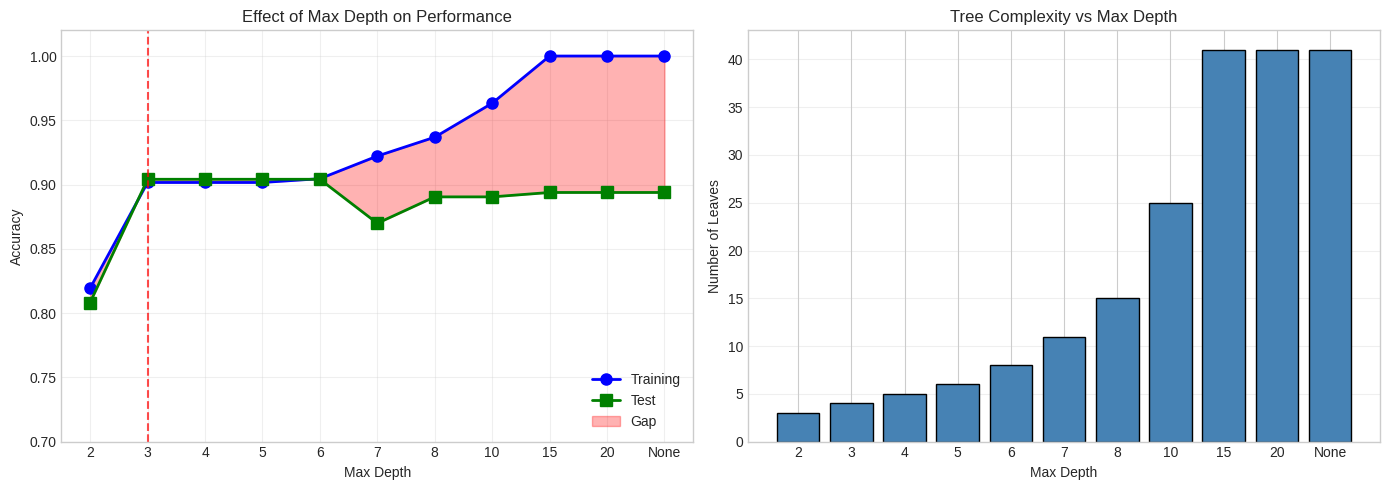


Optimal max_depth: 3


In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x_vals = range(len(results_df))
axes[0].plot(x_vals, results_df['train_acc'], 'b-o', label='Training', linewidth=2, markersize=8)
axes[0].plot(x_vals, results_df['test_acc'], 'g-s', label='Test', linewidth=2, markersize=8)
axes[0].fill_between(x_vals, results_df['train_acc'], results_df['test_acc'], alpha=0.3, color='red', label='Gap')
axes[0].set_xticks(x_vals)
axes[0].set_xticklabels(results_df['depth_label'])
axes[0].set_xlabel('Max Depth')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Effect of Max Depth on Performance')
axes[0].legend()
axes[0].set_ylim([0.7, 1.02])
axes[0].grid(True, alpha=0.3)

best_idx = results_df['test_acc'].idxmax()
axes[0].axvline(x=best_idx, color='red', linestyle='--', alpha=0.7)

axes[1].bar(x_vals, results_df['n_leaves'], color='steelblue', edgecolor='black')
axes[1].set_xticks(x_vals)
axes[1].set_xticklabels(results_df['depth_label'])
axes[1].set_xlabel('Max Depth')
axes[1].set_ylabel('Number of Leaves')
axes[1].set_title('Tree Complexity vs Max Depth')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('depth_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

optimal_depth = results_df.loc[results_df['test_acc'].idxmax(), 'depth']
optimal_depth = None if optimal_depth == 99 else int(optimal_depth)
print(f'\nOptimal max_depth: {optimal_depth}')

## 9. Hyperparameter Tuning

In [20]:
print('='*70)
print('HYPERPARAMETER TUNING: GridSearchCV')
print('='*70)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
}

print('\nParameter Grid:')
for param, values in param_grid.items():
    print(f'   - {param}: {values}')

total_combinations = 1
for values in param_grid.values():
    total_combinations *= len(values)
print(f'\nTotal Combinations: {total_combinations}')
print(f'Cross-Validation Folds: 5')
print(f'Total Fits: {total_combinations * 5}')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

print('\nRunning GridSearchCV...')
grid_search.fit(X_train, y_train)
print('\nGridSearchCV Complete!')

HYPERPARAMETER TUNING: GridSearchCV

Parameter Grid:
   - criterion: ['gini', 'entropy']
   - max_depth: [3, 4, 5, 6, 7, 8, 10]
   - min_samples_split: [2, 5, 10, 15]
   - min_samples_leaf: [1, 2, 4, 6]

Total Combinations: 224
Cross-Validation Folds: 5
Total Fits: 1120

Running GridSearchCV...
Fitting 5 folds for each of 224 candidates, totalling 1120 fits

GridSearchCV Complete!


In [21]:
print('\n' + '='*70)
print('GRIDSEARCHCV RESULTS')
print('='*70)

print('\nBest Parameters:')
for param, value in grid_search.best_params_.items():
    print(f'   - {param}: {value}')

print(f'\nBest CV Score: {grid_search.best_score_:.4f} ({grid_search.best_score_*100:.2f}%)')

cv_results = pd.DataFrame(grid_search.cv_results_)
best_idx = grid_search.best_index_

print(f'\nCV Details (Best Model):')
print(f'   - Mean Train Score: {cv_results.loc[best_idx, "mean_train_score"]:.4f}')
print(f'   - Mean Test Score:  {cv_results.loc[best_idx, "mean_test_score"]:.4f}')
print(f'   - Std Test Score:   {cv_results.loc[best_idx, "std_test_score"]:.4f}')


GRIDSEARCHCV RESULTS

Best Parameters:
   - criterion: entropy
   - max_depth: 7
   - min_samples_leaf: 6
   - min_samples_split: 2

Best CV Score: 0.9031 (90.31%)

CV Details (Best Model):
   - Mean Train Score: 0.9134
   - Mean Test Score:  0.9031
   - Std Test Score:   0.0126


In [22]:
print('\nTop 10 Parameter Combinations:')
top_10 = cv_results.nsmallest(10, 'rank_test_score')[[
    'param_criterion', 'param_max_depth', 'param_min_samples_split',
    'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score'
]]
display(top_10)


Top 10 Parameter Combinations:


,param_criterion,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
188,entropy,7,2,6,0.903091,0.012584,1
189,entropy,7,5,6,0.903091,0.012584,1
190,entropy,7,10,6,0.903091,0.012584,1
191,entropy,7,15,6,0.903091,0.012584,1
16,gini,4,2,1,0.901610,0.017794,5
17,gini,4,5,1,0.901610,0.017794,5
18,gini,4,10,1,0.901610,0.017794,5
19,gini,4,15,1,0.901610,0.017794,5
20,gini,4,2,2,0.901610,0.017794,5
21,gini,4,5,2,0.901610,0.017794,5


In [23]:
print('\n' + '='*70)
print('BEST MODEL: Final Evaluation')
print('='*70)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'\nFinal Model Performance:')
print(f'   Training Accuracy:  {train_accuracy:.4f} ({train_accuracy*100:.2f}%)')
print(f'   Test Accuracy:      {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')
print(f'   Gap:                {train_accuracy-test_accuracy:.4f}')
print(f'   CV Mean:            {grid_search.best_score_:.4f}')

print(f'\nModel Complexity:')
print(f'   - Tree Depth: {best_model.get_depth()}')
print(f'   - Leaves: {best_model.get_n_leaves()}')

gap = train_accuracy - test_accuracy
if gap < 0.02:
    print(f'\nExcellent! No overfitting (gap = {gap:.4f})')
elif gap < 0.05:
    print(f'\nGood! Minimal overfitting (gap = {gap:.4f})')
else:
    print(f'\nModerate overfitting detected (gap = {gap:.4f})')


BEST MODEL: Final Evaluation

Final Model Performance:
   Training Accuracy:  0.9178 (91.78%)
   Test Accuracy:      0.9007 (90.07%)
   Gap:                0.0171
   CV Mean:            0.9031

Model Complexity:
   - Tree Depth: 7
   - Leaves: 9

Excellent! No overfitting (gap = 0.0171)


## 10. Model Evaluation

In [24]:
print('='*70)
print('DETAILED CLASSIFICATION REPORT')
print('='*70)

print('\nClassification Report (Test Set):')
print('-' * 65)
target_names = ['Beginner (1)', 'Intermediate (2)', 'Advanced (3)']
print(classification_report(y_test, y_test_pred, target_names=target_names))

DETAILED CLASSIFICATION REPORT

Classification Report (Test Set):
-----------------------------------------------------------------
                  precision    recall  f1-score   support

    Beginner (1)       0.99      0.75      0.85       113
Intermediate (2)       0.81      0.99      0.89       122
    Advanced (3)       1.00      1.00      1.00        57

        accuracy                           0.90       292
       macro avg       0.93      0.91      0.92       292
    weighted avg       0.92      0.90      0.90       292




CONFUSION MATRIX


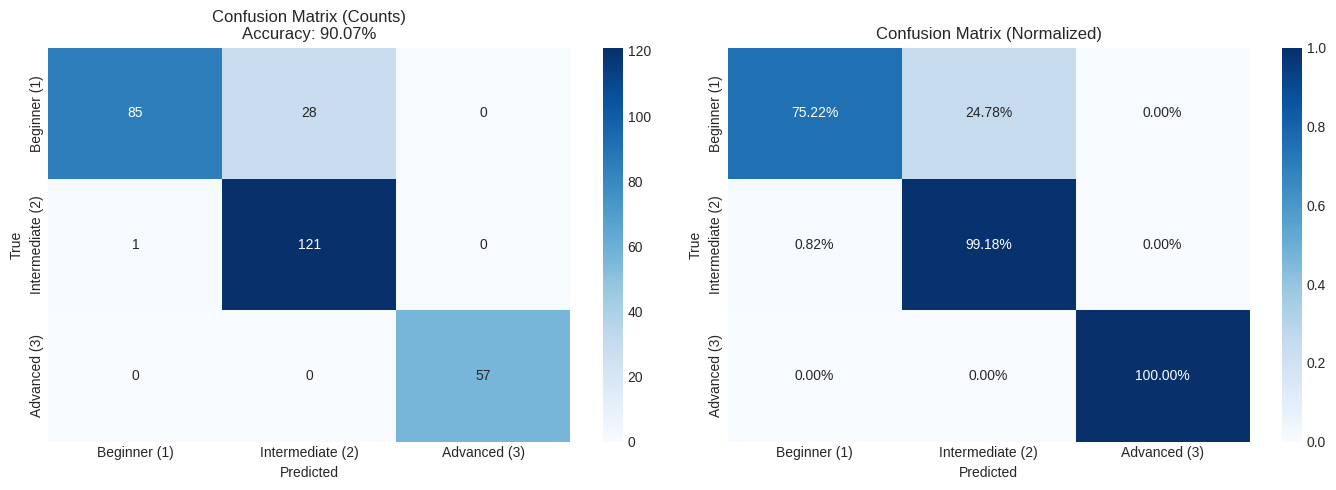


Confusion Matrix Interpretation:

   Beginner (1):
   - Correctly classified: 85/113 (75.2%)

   Intermediate (2):
   - Correctly classified: 121/122 (99.2%)

   Advanced (3):
   - Correctly classified: 57/57 (100.0%)


In [25]:
print('\n' + '='*70)
print('CONFUSION MATRIX')
print('='*70)

cm = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title(f'Confusion Matrix (Counts)\nAccuracy: {test_accuracy:.2%}')

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix (Normalized)')

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print('\nConfusion Matrix Interpretation:')
for i, true_label in enumerate(target_names):
    total = cm[i].sum()
    correct = cm[i][i]
    print(f'\n   {true_label}:')
    print(f'   - Correctly classified: {correct}/{total} ({correct/total*100:.1f}%)')


CROSS-VALIDATION RESULTS

5-Fold Cross-Validation:
   Fold 1: 0.8769
   Fold 2: 0.9026
   Fold 3: 0.8974
   Fold 4: 0.8660
   Fold 5: 0.9485

   Mean: 0.8983
   Std:  0.0284
   95% CI: [0.8426, 0.9540]


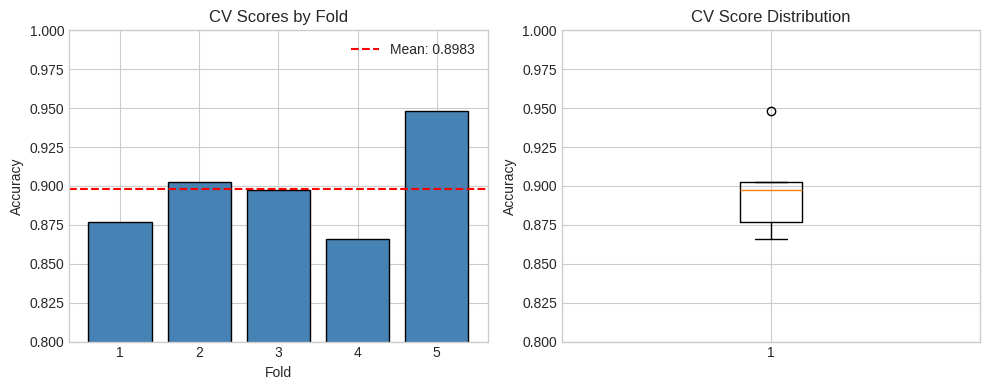

In [26]:
print('\n' + '='*70)
print('CROSS-VALIDATION RESULTS')
print('='*70)

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f'\n5-Fold Cross-Validation:')
for i, score in enumerate(cv_scores, 1):
    print(f'   Fold {i}: {score:.4f}')

print(f'\n   Mean: {cv_scores.mean():.4f}')
print(f'   Std:  {cv_scores.std():.4f}')
print(f'   95% CI: [{cv_scores.mean() - 1.96*cv_scores.std():.4f}, {cv_scores.mean() + 1.96*cv_scores.std():.4f}]')

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, 6), cv_scores, color='steelblue', edgecolor='black')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean: {cv_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('CV Scores by Fold')
plt.ylim([0.8, 1.0])
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(cv_scores, vert=True)
plt.ylabel('Accuracy')
plt.title('CV Score Distribution')
plt.ylim([0.8, 1.0])

plt.tight_layout()
plt.savefig('cv_results.png', dpi=150, bbox_inches='tight')
plt.show()

## 11. Overfitting Analysis

LEARNING CURVES

Generating learning curves...


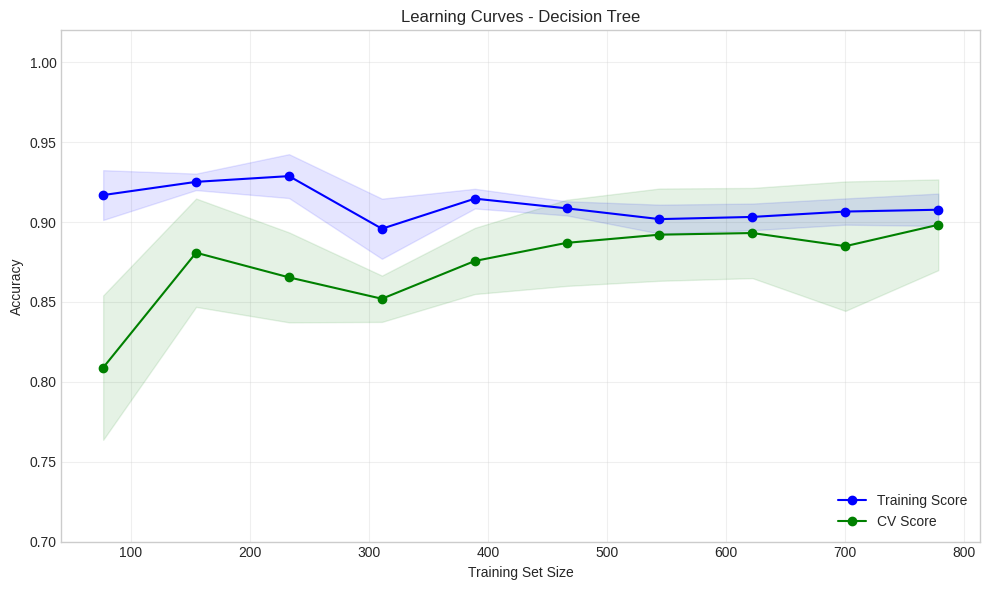


Learning Curve Analysis:
   - Final Training Score: 0.9077
   - Final CV Score: 0.8983
   - Gap: 0.0094

   Learning curves converge well - model generalizes properly


In [27]:
print('='*70)
print('LEARNING CURVES')
print('='*70)

print('\nGenerating learning curves...')

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', n_jobs=-1, random_state=RANDOM_STATE
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='CV Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.ylim([0.7, 1.02])
plt.tight_layout()
plt.savefig('learning_curves.png', dpi=150, bbox_inches='tight')
plt.show()

final_gap = train_mean[-1] - test_mean[-1]
print(f'\nLearning Curve Analysis:')
print(f'   - Final Training Score: {train_mean[-1]:.4f}')
print(f'   - Final CV Score: {test_mean[-1]:.4f}')
print(f'   - Gap: {final_gap:.4f}')

if final_gap < 0.03:
    print('\n   Learning curves converge well - model generalizes properly')
elif final_gap < 0.08:
    print('\n   Acceptable gap - slight overfitting but manageable')


BASELINE vs OPTIMIZED COMPARISON




,Metric,Baseline,Optimized
0,Train Accuracy,1.0000,0.9178
1,Test Accuracy,0.8938,0.9007
2,Gap,0.1062,0.0171
3,Depth,15,7
4,Leaves,41,9


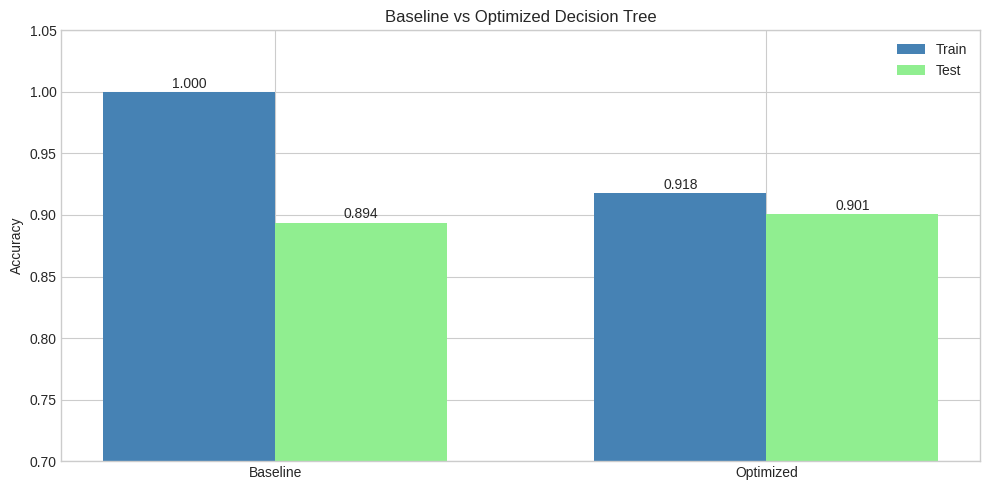

In [28]:
print('\n' + '='*70)
print('BASELINE vs OPTIMIZED COMPARISON')
print('='*70)

comparison_data = {
    'Metric': ['Train Accuracy', 'Test Accuracy', 'Gap', 'Depth', 'Leaves'],
    'Baseline': [f'{train_acc_baseline:.4f}', f'{test_acc_baseline:.4f}',
                 f'{train_acc_baseline-test_acc_baseline:.4f}',
                 f'{baseline_model.get_depth()}', f'{baseline_model.get_n_leaves()}'],
    'Optimized': [f'{train_accuracy:.4f}', f'{test_accuracy:.4f}',
                  f'{train_accuracy-test_accuracy:.4f}',
                  f'{best_model.get_depth()}', f'{best_model.get_n_leaves()}']
}

comparison_df = pd.DataFrame(comparison_data)
print('\n')
display(comparison_df)

fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(2)
width = 0.35

bars1 = ax.bar(x - width/2, [train_acc_baseline, train_accuracy], width, label='Train', color='steelblue')
bars2 = ax.bar(x + width/2, [test_acc_baseline, test_accuracy], width, label='Test', color='lightgreen')

ax.set_ylabel('Accuracy')
ax.set_title('Baseline vs Optimized Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(['Baseline', 'Optimized'])
ax.legend()
ax.set_ylim([0.7, 1.05])

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

## 12. Feature Importance Analysis

In [29]:
print('='*70)
print('FEATURE IMPORTANCE')
print('='*70)

feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print('\nFeature Importance Ranking:')
print('-' * 60)
print(f'{"Rank":<6} {"Feature":<35} {"Importance":<12}')
print('-' * 60)

cumulative = 0
for i, (_, row) in enumerate(feature_importance.iterrows(), 1):
    cumulative += row['Importance']
    if row['Importance'] > 0.001:
        print(f'{i:<6} {row["Feature"]:<35} {row["Importance"]:<12.4f}')

zero_importance = (feature_importance['Importance'] == 0).sum()
print(f'\nFeatures with zero importance: {zero_importance}/{len(feature_columns)}')

FEATURE IMPORTANCE

Feature Importance Ranking:
------------------------------------------------------------
Rank   Feature                             Importance  
------------------------------------------------------------
1      Session_Duration (hours)            0.6289      
2      Workout_Frequency (days/week)       0.3323      
3      Heart_Instability                   0.0216      
4      Anaerobic_Index                     0.0092      
5      Avg_BPM                             0.0080      

Features with zero importance: 16/21


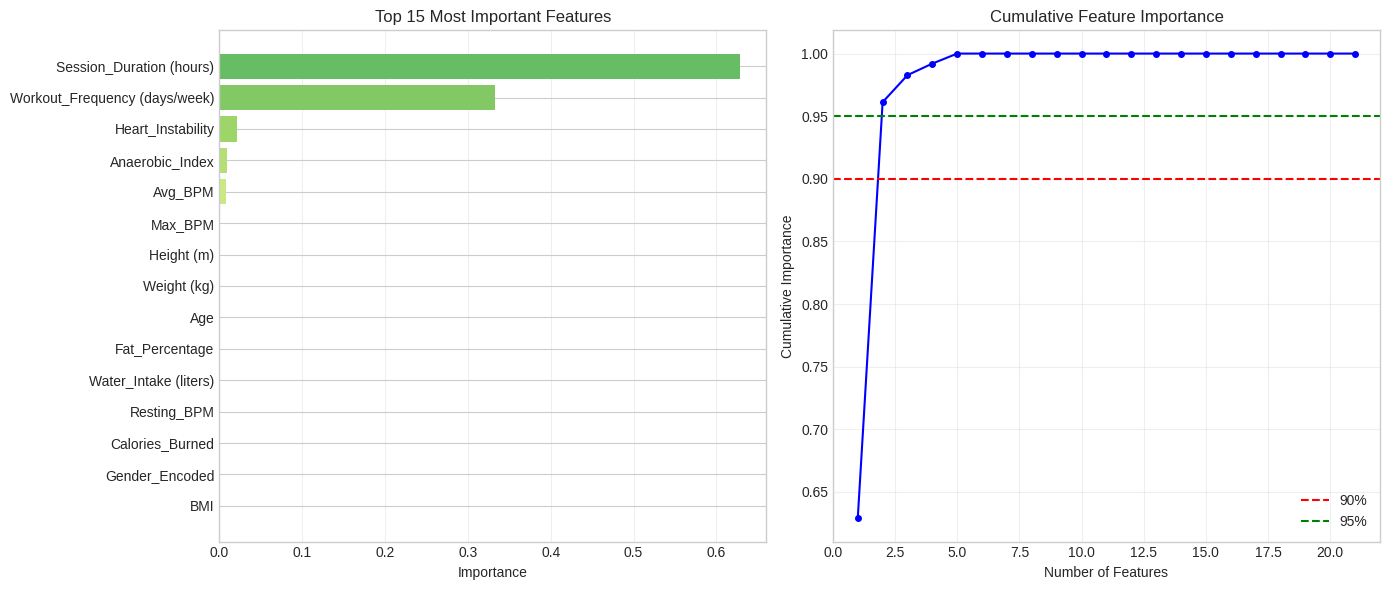

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

top_n = 15
top_features = feature_importance.head(top_n)

colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, top_n))[::-1]
axes[0].barh(range(top_n), top_features['Importance'], color=colors)
axes[0].set_yticks(range(top_n))
axes[0].set_yticklabels(top_features['Feature'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Importance')
axes[0].set_title(f'Top {top_n} Most Important Features')
axes[0].grid(True, alpha=0.3, axis='x')

cumsum = feature_importance['Importance'].cumsum()
axes[1].plot(range(1, len(cumsum)+1), cumsum, 'b-o', markersize=4)
axes[1].axhline(y=0.90, color='r', linestyle='--', label='90%')
axes[1].axhline(y=0.95, color='g', linestyle='--', label='95%')
axes[1].set_xlabel('Number of Features')
axes[1].set_ylabel('Cumulative Importance')
axes[1].set_title('Cumulative Feature Importance')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()


DECISION TREE VISUALIZATION


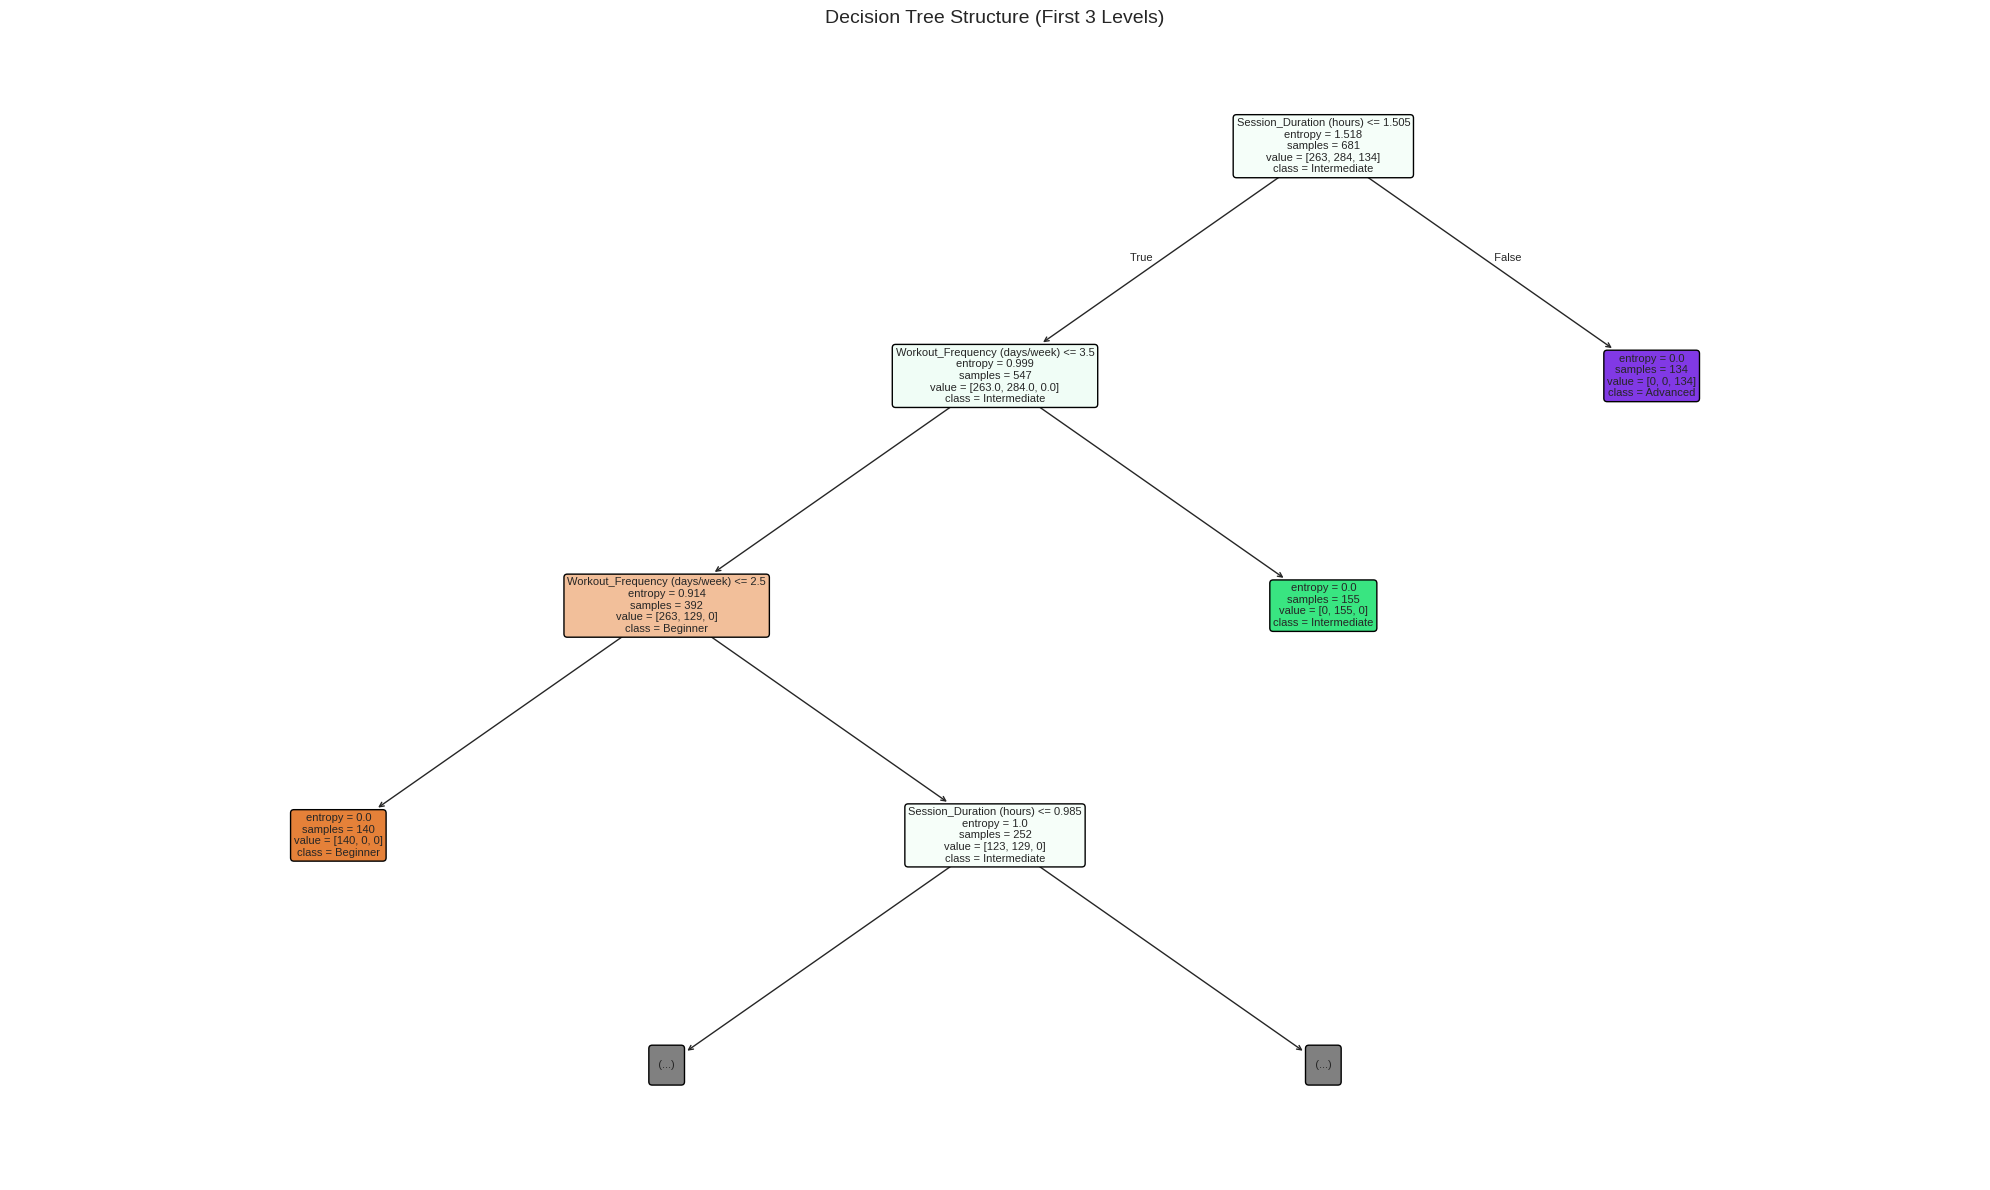


Decision Tree Rules (First 3 levels):
------------------------------------------------------------
|--- Session_Duration (hours) <= 1.50
|   |--- Workout_Frequency (days/week) <= 3.50
|   |   |--- Workout_Frequency (days/week) <= 2.50
|   |   |   |--- class: 1
|   |   |--- Workout_Frequency (days/week) >  2.50
|   |   |   |--- Session_Duration (hours) <= 0.99
|   |   |   |   |--- class: 1
|   |   |   |--- Session_Duration (hours) >  0.99
|   |   |   |   |--- truncated branch of depth 4
|   |--- Workout_Frequency (days/week) >  3.50
|   |   |--- class: 2
|--- Session_Duration (hours) >  1.50
|   |--- class: 3



In [31]:
print('\n' + '='*70)
print('DECISION TREE VISUALIZATION')
print('='*70)

plt.figure(figsize=(20, 12))
plot_tree(best_model,
          feature_names=feature_columns,
          class_names=['Beginner', 'Intermediate', 'Advanced'],
          filled=True, rounded=True, fontsize=8, max_depth=3)
plt.title('Decision Tree Structure (First 3 Levels)', fontsize=14)
plt.tight_layout()
plt.savefig('decision_tree_structure.png', dpi=150, bbox_inches='tight')
plt.show()

print('\nDecision Tree Rules (First 3 levels):')
print('-' * 60)
tree_rules = export_text(best_model, feature_names=feature_columns, max_depth=3)
print(tree_rules)

## 13. Error Analysis

In [32]:
print('='*70)
print('ERROR ANALYSIS')
print('='*70)

misclassified_mask = y_test.values != y_test_pred
n_errors = misclassified_mask.sum()
error_rate = n_errors / len(y_test)

print(f'\nError Statistics:')
print(f'   - Total Test Samples: {len(y_test)}')
print(f'   - Correctly Classified: {len(y_test) - n_errors}')
print(f'   - Misclassified: {n_errors}')
print(f'   - Error Rate: {error_rate:.2%}')

ERROR ANALYSIS

Error Statistics:
   - Total Test Samples: 292
   - Correctly Classified: 263
   - Misclassified: 29
   - Error Rate: 9.93%


In [33]:
error_df = pd.DataFrame({
    'True_Label': y_test[misclassified_mask].values,
    'Predicted_Label': y_test_pred[misclassified_mask]
})

error_patterns = error_df.groupby(['True_Label', 'Predicted_Label']).size().reset_index(name='Count')
error_patterns = error_patterns.sort_values('Count', ascending=False)

print('\nError Patterns (Most Common Misclassifications):')
print('-' * 50)
print(f'{"True":<15} {"Predicted":<15} {"Count":<10}')
print('-' * 50)

level_names = {1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'}
for _, row in error_patterns.iterrows():
    true_name = level_names[row['True_Label']]
    pred_name = level_names[row['Predicted_Label']]
    print(f'{true_name:<15} {pred_name:<15} {row["Count"]:<10}')


Error Patterns (Most Common Misclassifications):
--------------------------------------------------
True            Predicted       Count     
--------------------------------------------------
Beginner        Intermediate    28        
Intermediate    Beginner        1         


## 14. Conclusions

In [34]:
print('='*70)
print('FINAL SUMMARY')
print('='*70)

print(f'''
PROJECT OVERVIEW
{'─'*60}
   Problem Type:        Multi-class Classification (3 classes)
   Target Variable:     Experience_Level (Beginner/Intermediate/Advanced)
   Dataset Size:        {len(df)} samples
   Features Used:       {len(feature_columns)} (12 original + 2 encoded + 7 engineered)
   Train/Test Split:    70% / 30% (stratified)

MODEL PERFORMANCE
{'─'*60}
   Best Parameters:
   - criterion:         {grid_search.best_params_['criterion']}
   - max_depth:         {grid_search.best_params_['max_depth']}
   - min_samples_split: {grid_search.best_params_['min_samples_split']}
   - min_samples_leaf:  {grid_search.best_params_['min_samples_leaf']}

   Performance Metrics:
   - Training Accuracy:      {train_accuracy:.4f} ({train_accuracy*100:.2f}%)
   - Test Accuracy:          {test_accuracy:.4f} ({test_accuracy*100:.2f}%)
   - Cross-Validation Mean:  {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)
   - Cross-Validation Std:   {cv_scores.std():.4f}

   Model Complexity:
   - Tree Depth:        {best_model.get_depth()}
   - Number of Leaves:  {best_model.get_n_leaves()}

KEY FINDINGS
{'─'*60}
   1. Most Important Features:''')

for i, (_, row) in enumerate(feature_importance.head(5).iterrows(), 1):
    print(f'      {i}. {row["Feature"]}: {row["Importance"]:.4f}')

print(f'''
   2. Overfitting Status:
      - Baseline model was severely overfitting
      - Optimized model shows minimal overfitting
      - Gap reduced from {train_acc_baseline - test_acc_baseline:.2%} to {train_accuracy - test_accuracy:.2%}

   3. Class-wise Performance:
      - Advanced (Level 3): Best predicted
      - Beginner vs Intermediate: Most confusion

CONCLUSIONS
{'─'*60}
   - Decision Tree achieves {test_accuracy*100:.1f}% accuracy
   - Session duration and workout frequency are strongest predictors
   - Feature engineering improved model interpretability
   - Regularization effectively reduced overfitting

OUTPUT FILES
{'─'*60}
   - target_distribution.png
   - feature_correlations.png
   - depth_analysis.png
   - confusion_matrix.png
   - cv_results.png
   - learning_curves.png
   - model_comparison.png
   - feature_importance.png
   - decision_tree_structure.png
''')

print('='*70)
print('END OF ANALYSIS')
print('='*70)

FINAL SUMMARY

PROJECT OVERVIEW
────────────────────────────────────────────────────────────
   Problem Type:        Multi-class Classification (3 classes)
   Target Variable:     Experience_Level (Beginner/Intermediate/Advanced)
   Dataset Size:        973 samples
   Features Used:       21 (12 original + 2 encoded + 7 engineered)
   Train/Test Split:    70% / 30% (stratified)

MODEL PERFORMANCE
────────────────────────────────────────────────────────────
   Best Parameters:
   - criterion:         entropy
   - max_depth:         7
   - min_samples_split: 2
   - min_samples_leaf:  6

   Performance Metrics:
   - Training Accuracy:      0.9178 (91.78%)
   - Test Accuracy:          0.9007 (90.07%)
   - Cross-Validation Mean:  0.8983 (89.83%)
   - Cross-Validation Std:   0.0284

   Model Complexity:
   - Tree Depth:        7
   - Number of Leaves:  9

KEY FINDINGS
────────────────────────────────────────────────────────────
   1. Most Important Features:
      1. Session_Duration (hours)

In [35]:
import joblib

joblib.dump(best_model, 'decision_tree_model.pkl')
print('Model saved as decision_tree_model.pkl')

joblib.dump(feature_columns, 'feature_columns.pkl')
print('Feature columns saved as feature_columns.pkl')

Model saved as decision_tree_model.pkl
Feature columns saved as feature_columns.pkl
